# Importing necessary libraries & parameter setup

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline

# Reading files

In [19]:
test1=pd.read_csv("/home/java/Desktop/HORIZON2020/DATASETS/sc/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
test2=pd.read_csv("/home/java/Desktop/HORIZON2020/DATASETS/sc/02_01_District_wise_crimes_committed_against_SC_2013.csv")


#test1=pd.read_csv("C:/Users/abhishek/Desktop/PROJECT/HORIZON2020_step towards crime free india/DATA SETS/sc/02_01_District_wise_crimes_committed_against_SC_2001_2012.csv")
#test2=pd.read_csv("C:/Users/abhishek/Desktop/PROJECT/HORIZON2020_step towards crime free india/DATA SETS/sc/02_01_District_wise_crimes_committed_against_SC_2013.csv")


#test3=pd.read_csv("C:/Users/abhishek/Desktop/PROJECT/HORIZON2020_step towards crime free india/DATA SETS/sc/02_01_District_wise_crimes_committed_against_SC_2014.csv")

# Merging and reorganising data

In [20]:
merged_data=pd.concat([test1,test2])

In [21]:
final=merged_data[merged_data.DISTRICT != 'TOTAL']
reorganised=final[['STATE/UT','DISTRICT','Year','Murder','Rape','Kidnapping and Abduction','Dacoity','Robbery','Arson','Hurt','Prevention of atrocities (POA) Act','Protection of Civil Rights (PCR) Act','Other Crimes Against SCs']]

# Data cleaning

In [22]:
pv=reorganised.rename(columns={'STATE/UT' : "STATE_UT"})

In [23]:
pv['STATE_UT'] = pv.STATE_UT.apply(str.upper)
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("DELHI UT","DELHI"))
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("D & N HAVELI","D&N HAVELI"))
pv['STATE_UT'] = pv.STATE_UT.apply(lambda x:x.replace("A & N ISLANDS","A&N ISLANDS"))

# Cross check cleaning

In [24]:
states=pv.STATE_UT.unique()

# Data aggregration

In [25]:
year_totals = pv.groupby('Year')
year_agg = year_totals.sum().reset_index()

year_agg=year_agg.rename(columns={'Kidnapping and Abduction':'Kidnapping','Prevention of atrocities (POA) Act':'POA','Protection of Civil Rights (PCR) Act':'PCR','Other Crimes Against SCs':'Other'})

year_agg

,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other
0,2001,763,1316,400,41,133,354,4547,13114,633,12201
1,2002,739,1332,318,29,105,322,4491,10770,1018,14383
2,2003,581,1089,232,24,70,204,3969,8048,634,11399
3,2004,654,1157,253,26,72,211,3824,8892,364,11435
4,2005,669,1172,258,26,80,210,3847,8497,291,11077
5,2006,673,1218,280,30,90,226,3762,8581,405,11811
6,2007,674,1349,332,23,86,238,3814,9819,206,13490
7,2008,622,1453,477,50,81,224,4134,11465,279,14645
8,2009,629,1350,511,42,67,195,4322,11037,168,15091
9,2010,572,1350,510,41,75,150,4344,10419,143,15039


In [26]:
year_agg.describe()

,Year,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2007.00000,659.692308,1384.000000,408.076923,33.846154,78.076923,223.538462,4158.230769,10657.307692,333.230769,13576.076923
std,3.89444,53.406280,253.014163,139.040439,9.044760,23.239555,56.371706,352.987996,1863.642508,282.509927,1812.889198
min,2001.00000,572.000000,1089.000000,232.000000,23.000000,40.000000,150.000000,3762.000000,8048.000000,62.000000,11077.000000
25%,2004.00000,629.000000,1218.000000,280.000000,26.000000,67.000000,195.000000,3847.000000,8892.000000,143.000000,11811.000000
50%,2007.00000,669.000000,1349.000000,400.000000,30.000000,75.000000,211.000000,4134.000000,10770.000000,279.000000,14164.000000
75%,2010.00000,674.000000,1453.000000,510.000000,41.000000,86.000000,226.000000,4344.000000,11465.000000,405.000000,14957.000000
max,2013.00000,763.000000,2073.000000,628.000000,50.000000,133.000000,354.000000,4901.000000,13975.000000,1018.000000,16797.000000


# Comparing various factors among

Text(0,0.5,'CRIME')

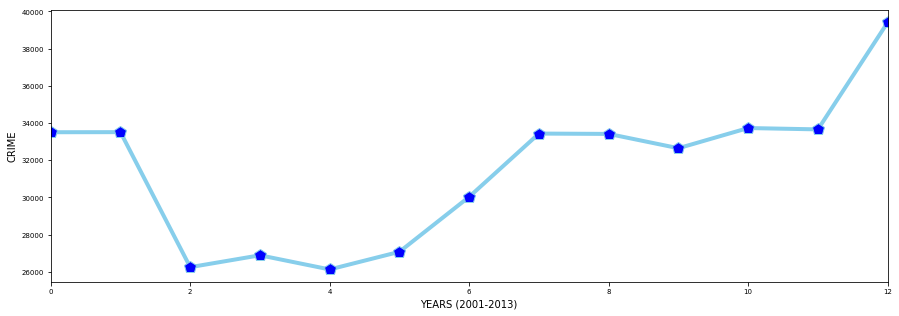

In [27]:
ax=year_agg.loc[:,'Murder':'Other'].sum(axis=1).plot(y=year_agg.Year,figsize=(15,5),markerfacecolor='blue',marker='p',markersize=12,color='skyblue',fontsize=7,linewidth=4)
ax.set_xlabel('YEARS (2001-2013)')
ax.set_ylabel('CRIME')

# Yearwise categorical crime progression (2001-2013)


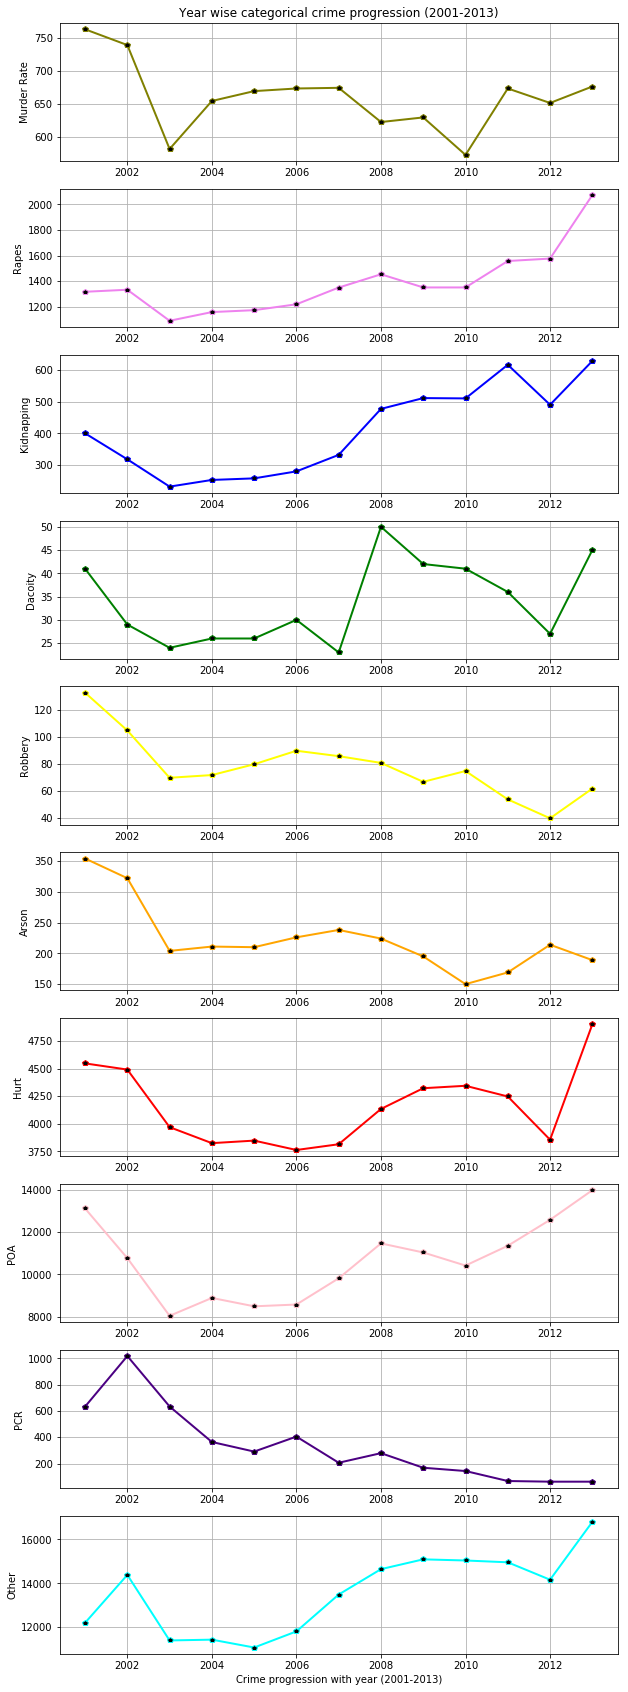

In [28]:
plot_crime_progression=year_agg.drop(['Year'],axis=1)

plt.figure(figsize=(10,30)) 
plt.subplot(10, 1, 1)
plt.plot(year_agg.Year,year_agg.Murder, 'o-',markerfacecolor='black',marker='p',linewidth=2,color='olive')
plt.title('Year wise categorical crime progression (2001-2013)')
plt.ylabel('Murder Rate')
plt.grid(True)


plt.subplot(10, 1, 2)
plt.plot(year_agg.Year,year_agg.Rape, '.-',markerfacecolor='black',marker='p',linewidth=2,color='violet')
plt.ylabel('Rapes')
plt.grid(True)

plt.subplot(10, 1, 3)
plt.plot(year_agg.Year,year_agg.Kidnapping, '.-',markerfacecolor='black',marker='p',linewidth=2,color='blue')
plt.ylabel('Kidnapping')
plt.grid(True)

plt.subplot(10, 1, 4)
plt.plot(year_agg.Year,year_agg.Dacoity, '.-',markerfacecolor='black',marker='p',linewidth=2,color='green')
plt.ylabel('Dacoity')
plt.grid(True)

plt.subplot(10, 1, 5)
plt.plot(year_agg.Year,year_agg.Robbery, '.-',markerfacecolor='black',marker='p',linewidth=2,color='yellow')
plt.ylabel('Robbery')
plt.grid(True)

plt.subplot(10, 1, 6)
plt.plot(year_agg.Year,year_agg.Arson, '.-',markerfacecolor='black',marker='p',linewidth=2,color='orange')
plt.ylabel('Arson')
plt.grid(True)

plt.subplot(10, 1, 7)
plt.plot(year_agg.Year,year_agg.Hurt, '.-',markerfacecolor='black',marker='p',linewidth=2,color='red')
plt.ylabel('Hurt')
plt.grid(True)

plt.subplot(10, 1, 8)
plt.plot(year_agg.Year,year_agg.POA, '.-',markerfacecolor='black',marker='p',linewidth=2,color='pink')
plt.ylabel('POA')
plt.grid(True)

plt.subplot(10, 1, 9)
plt.plot(year_agg.Year,year_agg.PCR, '.-',markerfacecolor='black',marker='p',linewidth=2,color='indigo')
plt.ylabel('PCR')
plt.grid(True)

plt.subplot(10, 1, 10)
plt.plot(year_agg.Year,year_agg.Other, '.-',markerfacecolor='black',marker='p',linewidth=2,color='cyan')
plt.xlabel('Crime progression with year (2001-2013)')
plt.ylabel('Other')
plt.grid(True)



In [12]:
year_totals = pv.groupby('STATE_UT')
year_agg = year_totals.sum().reset_index()

year_agg=year_agg.rename(columns={'Kidnapping and Abduction':'Kidnapping','Prevention of atrocities (POA) Act':'POA','Protection of Civil Rights (PCR) Act':'PCR','Other Crimes Against SCs':'Other'})

final=year_agg.drop('Year',axis=1)
final

,STATE_UT,Murder,Rape,Kidnapping,Dacoity,Robbery,Arson,Hurt,POA,PCR,Other
0,A&N ISLANDS,0,0,0,0,0,0,0,0,0,0
1,ANDHRA PRADESH,609,1224,252,12,40,141,7907,15855,1517,19132
2,ARUNACHAL PRADESH,1,0,0,0,1,0,0,0,0,0
3,ASSAM,57,57,96,14,33,25,341,8,1,322
4,BIHAR,336,352,136,29,78,360,4813,29009,466,4483
5,CHANDIGARH,0,2,0,0,0,0,0,8,0,5
6,CHHATTISGARH,123,716,50,1,14,18,792,925,24,2793
7,D&N HAVELI,0,0,2,0,0,0,0,0,0,5
8,DAMAN & DIU,0,0,0,0,0,0,1,0,0,5
9,DELHI,1,0,0,0,0,0,0,293,9,36


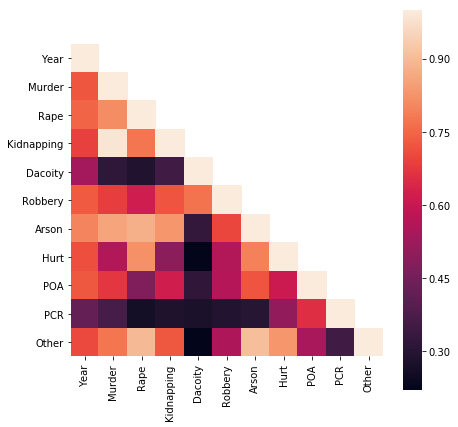

In [13]:
cols = list(year_agg.columns)
corr = year_agg[cols].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(7,7)
sn.heatmap(corr, mask=mask, ax=ax, square=True,)

# Predictive Analysis

In [14]:
#converting to dtetime format
pv.Year=pv.Year.astype('str')
pv.Year=pd.to_datetime(pv.Year)

            total
Year             
2001-01-01  33502
2002-01-01  33507
2003-01-01  26250
2004-01-01  26888
2005-01-01  26127
2006-01-01  27076
2007-01-01  30031
2008-01-01  33430
2009-01-01  33412
2010-01-01  32643


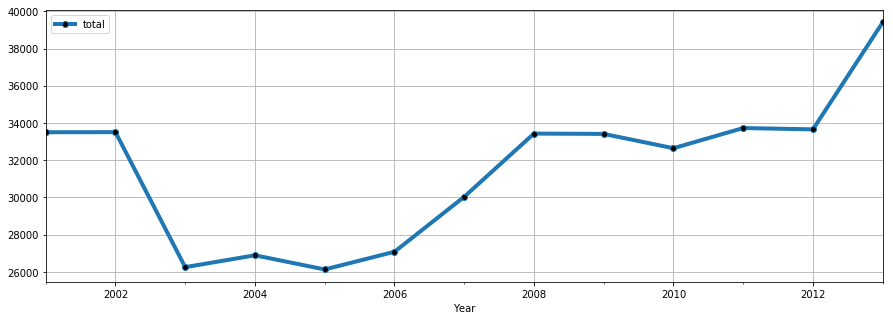

In [15]:
#adding total crime column

pv=pv.rename(columns={'Kidnapping and Abduction':'Kidnapping','Prevention of atrocities (POA) Act':'POA','Protection of Civil Rights (PCR) Act':'PCR','Other Crimes Against SCs':'Other'})
total_crime_sc=pv.loc[:,'Murder':'Other'].sum(axis=1)
pv['total']=total_crime_sc


df_arima=pv.groupby('Year').sum()
df_arima_total=df_arima.loc[:,['total']]
print(df_arima_total.head(10))
df_arima_total.plot(figsize=(15,5),grid=True,marker='o',linewidth=4,markerfacecolor='black')


/home/java/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


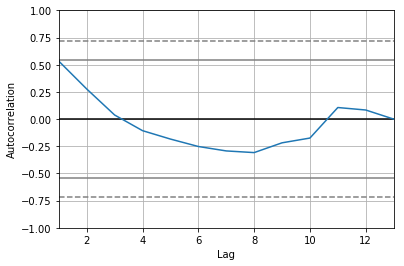

In [29]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(df_arima_total)

In [43]:
df_arima_total.to_csv(path_or_buf='/home/java/Desktop/HORIZON2020/DATASETS/sc/df_arima_total.csv')

In [44]:
from pandas import datetime
from pandas import DataFrame
import statsmodels as sm
from matplotlib import pyplot
 

 
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df_arima_test = pd.read_csv('/home/java/Desktop/HORIZON2020/DATASETS/sc/df_arima_total.csv',parse_dates=['Year'], index_col='Year',date_parser=dateparse)
# fit model
df_arima_test=df_arima_test.total.astype('int')
df_arima_test.columns=['year','total']
df_arima_test=df_arima_test.to_frame('df_arima_test')